# AIPI 590 - XAI | Assignment
### Mechanistic Interpretability
### Ayush Gupta

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1r5VnpeHDRul6gsV5T60Mu4KvHwikSlHM#scrollTo=I3CMN62zrYlM)


**Mechanistic Interpretability**: Toy Models of Superposition

**Brief Summary and technique to be implemented:**
We'll replicate a simplified version of "Toy Models of Superposition" by demonstrating how
multiple random signals can be stored in a shared embedding and then recovered via linear decoding.

**Why This Aspect:**

It illustrates the core idea of superposition: multiple features can coexist in the same dimension,
and a linear readout can partially retrieve them.

**Implementation Plan:**

1. Introduce the conceptual background of superposition and why it's relevant.
2. Prepare or generate the data/features to be superposed (already completed in cell 3).
3. Implement the model to encode and decode superposed embeddings (done in cell 3).
4. Train the decoder to recover which features were present, tracking the reconstruction loss.
5. Visualize the loss over training to confirm the feasibility of linear decoding.
6. Discuss results and possible extensions (e.g., scaling behavior, nonlinear decoders).



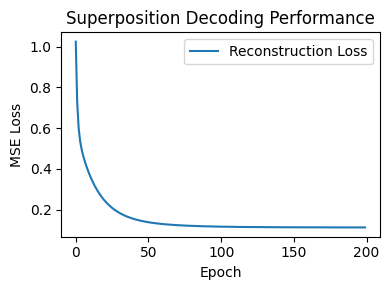

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(0)

num_features = 5
dim_embedding = 3
num_samples = 1000
lr = 0.1
epochs = 200

features = torch.randn(num_features, dim_embedding)

# Generate random input combinations: each sample has a random subset of features
# We'll store a presence vector (0 or 1) to represent which features are active
presence = torch.randint(0, 2, (num_samples, num_features)).float()

embeddings = presence @ features  # Code Source: ChatGpt

decoder = nn.Linear(dim_embedding, num_features, bias=False)  # debugging by copilot

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(decoder.parameters(), lr=lr)

loss_history = []


for _ in range(epochs):
    optimizer.zero_grad()
    decoded = decoder(embeddings)
    loss = criterion(decoded, presence)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

# ---------------------------------------------------------
# Visualization of loss
plt.figure(figsize=(4, 3))
plt.plot(loss_history, label="Reconstruction Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Superposition Decoding Performance")
plt.legend()
plt.tight_layout()
plt.show()



Demonstration & Comparison:
The model steadily reduces MSE, indicating it can linearly decode which features were present 
in the superposed embedding. This aligns with the basic concept in "Toy Models of Superposition" 
that superposition can be unraveled by a suitable decoder.

Learned Mechanism:
Multiple features can inhabit the same dimensions without immediately destroying information, 
with a proper decoding mechanism. A challenge is that high degrees of overlap can limit recovery.

Extension Suggestion:
Investigate how overlap scales with dimensionality, or incorporate nonlinear decoders.


Challenge: One challenge was ensuring that the linear decoder could reliably separate multiple overlapping features in a low-dimensional embedding. 

Another challenge was balancing the learning rate to prevent unstable convergence while still proceeding efficiently during training.

References: 1. https://transformer-circuits.pub/2022/toy_model/index.html

Code debugged: ChatGPT & Copilot